In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path


In [5]:
file = 'Data/InterpolacionNewtonNoequi.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'


In [6]:
Data = pd.read_csv(url,sep=',')
Data

,X,Y
0,0.0,-18
1,1.5,-13
2,2.0,0
3,3.8,5
4,4.2,3
5,5.9,10


In [7]:
X = np.float64(Data['X'])
Y = np.float64(Data['Y'])

In [30]:
def NewtonInterpolation(X,Y,x):
    
    sum_ = Y[0]
    Diff = np.zeros( ( len(X),len(Y) ) )
    

    Diff[:,0] = Y
        
    interpolacion = 1.0
        

    for i in range(1,len(X)):
        
        interpolacion *= (x-X[i-1])
        
        
        
        for j in range(i,len(X)):
            
            
            Diff[j,i] = (Diff[j,i-1]-Diff[j-1,i-1])/(X[j]-X[j-i]) 
            
        sum_ += interpolacion*Diff[i,i] 
        
        
         
    return sum_, np.round(Diff,2)

In [33]:
W, M = NewtonInterpolation(X,Y,2) 
print(M)

[[-18.     0.     0.     0.     0.     0.  ]
 [-13.     3.33   0.     0.     0.     0.  ]
 [  0.    26.    11.33   0.     0.     0.  ]
 [  5.     2.78 -10.1   -5.64   0.     0.  ]
 [  3.    -5.    -3.54   2.43   1.92   0.  ]
 [ 10.     4.12   4.34   2.02  -0.09  -0.34]]


In [34]:
xt = np.linspace(np.min(X),np.max(X),100)
yt = []

for x in xt:
    y, B = NewtonInterpolation(X,Y,x)
    yt.append( y )

<IPython.core.display.Javascript object>


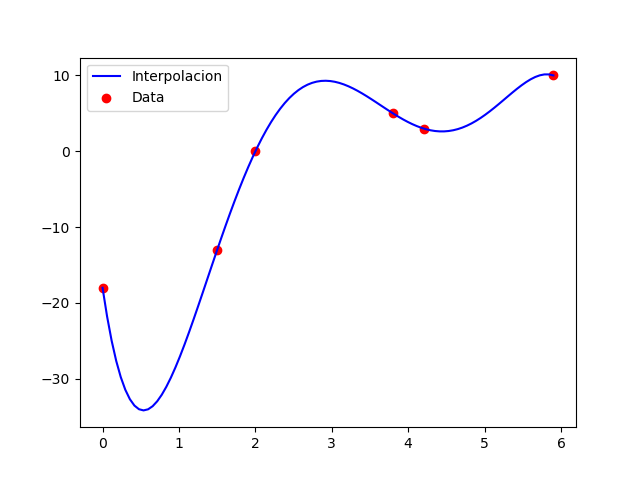

In [46]:
plt.plot(xt,yt,color='b',label='Interpolacion')
plt.scatter(X,Y,color='r',label='Data')
plt.legend(loc=0)
plt.show()

In [47]:
x  = sym.Symbol('x',Real='True')
y, z = NewtonInterpolation(X,Y,x)
y = sym.expand(y)
y

-0.34145435774264*x**5 + 5.84804869821673*x**4 - 35.6998197753506*x**3 + 89.657566164176*x**2 - 68.8369730888011*x - 18.0